# Live Daten Samstags

In [1]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import os
import sys
import datetime
import common.live

In [2]:
#config
matplotlib.style.use('ggplot')
%matplotlib inline

#constants
LIVE_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/live'

## Live Daten
___

In [3]:
#load live data
live = common.live.load(LIVE_DATA_DIRECTORY)

#create additional column
live['day'] = live.index.strftime('%Y-%m-%d')
live['weekday'] = live.index.dayofweek

## Auswertung 
___


20:00 - 22:00
day
2016-01-02     3335.000000
2016-01-09     6149.413223
2016-01-16     7618.776860
2016-01-23     8789.892562
2016-01-30     6881.917355
2016-02-06     6287.008264
2016-02-13     7086.727273
2016-02-20     6840.388430
2016-02-27     6184.950413
2016-03-05     6837.793388
2016-03-12     6779.157025
2016-03-19    23480.545455
2016-03-26     3198.752066
2016-04-02     3661.016529
2016-04-09     3514.107438
2016-04-16     3343.694215
2016-04-23     4467.297521
2016-04-30     2829.438017
2016-05-07     2519.636364
2016-05-14     4447.330579
2016-05-21     2638.049587
2016-05-28     2651.545455
2016-06-04     7109.892562
2016-06-11     2808.702479
2016-06-18     2992.628099
2016-06-25     3265.768595
2016-07-02     2148.140496
2016-07-09     2534.388430
2016-07-16     2519.942149
2016-07-23     2849.123967
2016-07-30     2953.132231
2016-08-06     2773.818182
2016-08-13     2412.000000
2016-08-20     7149.578512
2016-08-27     2493.768595
2016-09-03             NaN
2016-09-1

(0, 25000.0)

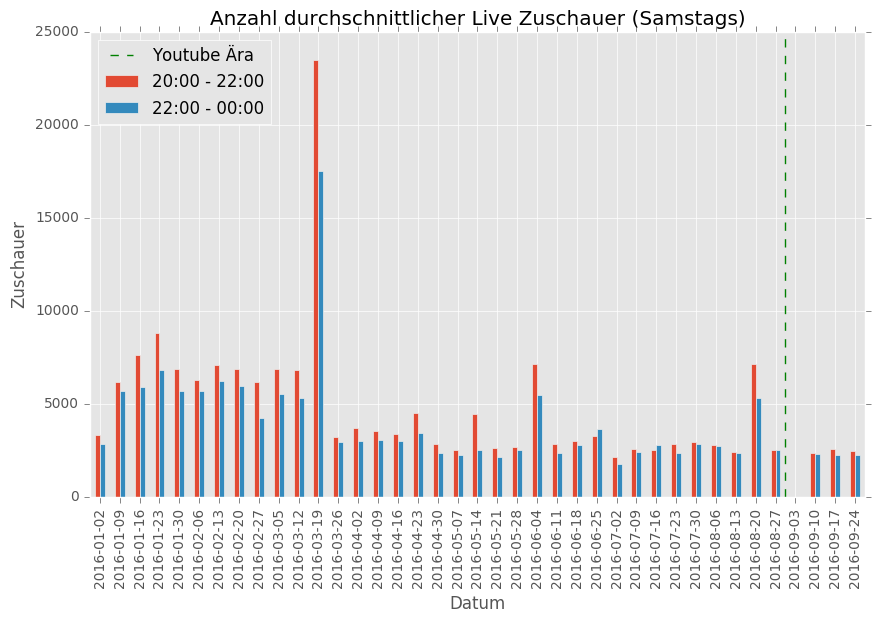

In [4]:
#filter data by date
youtubeStart = datetime.datetime(2016, 1, 1)
youtubeEnd = datetime.datetime.now()
liveFiltered = live.loc[youtubeStart : youtubeEnd]

#filter data by weekday
liveFiltered = liveFiltered[liveFiltered['weekday'] == 5]

#filter data by time (in 30 minutes interval)
rangeStart = datetime.time(20, 0, 0)
rangeEnd = datetime.time(22, 0, 0)
until = datetime.time(0, 0, 0)
data = pd.DataFrame({})
while True:
    rangeStr = rangeStart.strftime('%H:%M') + ' - ' + rangeEnd.strftime('%H:%M')

    #filter data by time
    liveFilteredTime = liveFiltered.between_time(rangeStart, rangeEnd)

    #group messages by date
    liveGrouped = liveFilteredTime.groupby('day')

    #filter groups by minimum number of datapoints
    liveGrouped = liveGrouped.filter(lambda group: len(group) > 25)

    #group messages by date
    liveGrouped = liveGrouped.groupby('day')

    #calculate mean for each day
    liveMean = liveGrouped.apply(lambda group: group['viewers'].mean())

    #output
    print('\n==================================================')
    print(rangeStr)
    print(liveMean)

    data[rangeStr] = liveMean

    if rangeEnd == until:
        break

    #add 2 hours
    rangeStart = (datetime.datetime.combine(datetime.date.today(), rangeStart) + datetime.timedelta(hours=2)).time()
    rangeEnd = (datetime.datetime.combine(datetime.date.today(), rangeEnd) + datetime.timedelta(hours=2)).time()

#plot
plot = data.plot(kind='bar', figsize=(10, 6), title='Anzahl durchschnittlicher Live Zuschauer (Samstags)')
plot.set_xlabel('Datum')
plot.set_ylabel('Zuschauer')

plot.axvline(x = 34.5, color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)

plt.ylim(ymin=0)